# Oncoprint Custom

In [1]:
library(ComplexHeatmap)
library(tidyverse)

Loading required package: grid

ComplexHeatmap version 2.13.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────

In [2]:
mat = read.table(textConnection(
"s1,s2,s3,s4
g1,snv_cfDNA;indel_tumor,;snv_tumor,indel_cfDNA;, TUMOR
g2,,snv_tumor;indel_cfDNA,,
g3,snv_cfDNA,,indel_cfDNA;snv_tumor, TUMOR
g4, SNV, , SNV, SNV"), row.names = 1, header = TRUE, sep = ",", stringsAsFactors = FALSE)
mat = as.matrix(mat)
mat

get_type_fun = function(x) strsplit(x, ";")[[1]]
get_type_fun(mat[1, 1])

,s1,s2,s3,s4
g1,snv_cfDNA;indel_tumor,;snv_tumor,indel_cfDNA;,TUMOR
g2,,snv_tumor;indel_cfDNA,,
g3,snv_cfDNA,,indel_cfDNA;snv_tumor,TUMOR
g4,SNV,,SNV,SNV


[1] "snv_cfDNA"   "indel_tumor"

In [3]:
col = c(snv_cfDNA = "red", indel_tumor = "blue", snv_tumor="yellow", indel_cfDNA="#ff5733")
mat_list = list(snv = matrix(c(1, 0, 1, 1, 1, 0, 0, 1, 1,1,1,1, 0, 1, 1, 0), nrow = 4),
                indel = matrix(c(1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,0,1), nrow = 4))
rownames(mat_list$snv) = rownames(mat_list$indel) = c("g1", "g2", "g3", "g4")
colnames(mat_list$snv) = colnames(mat_list$indel) = c("s1", "s2", "s3", "g4")
mat_list

,s1,s2,s3,g4
g1,1,1,1,0
g2,0,0,1,1
g3,1,0,1,1
g4,1,1,1,0
,s1,s2,s3,g4
g1,1,1,1,1
g2,0,0,1,1
g3,0,1,0,0
g4,0,0,0,1


All mutation types: snv_cfDNA, indel_tumor, SNV, snv_tumor,
indel_cfDNA, TUMOR.

Colors are not defined for: SNV, TUMOR. They won't be shown in the
barplots.



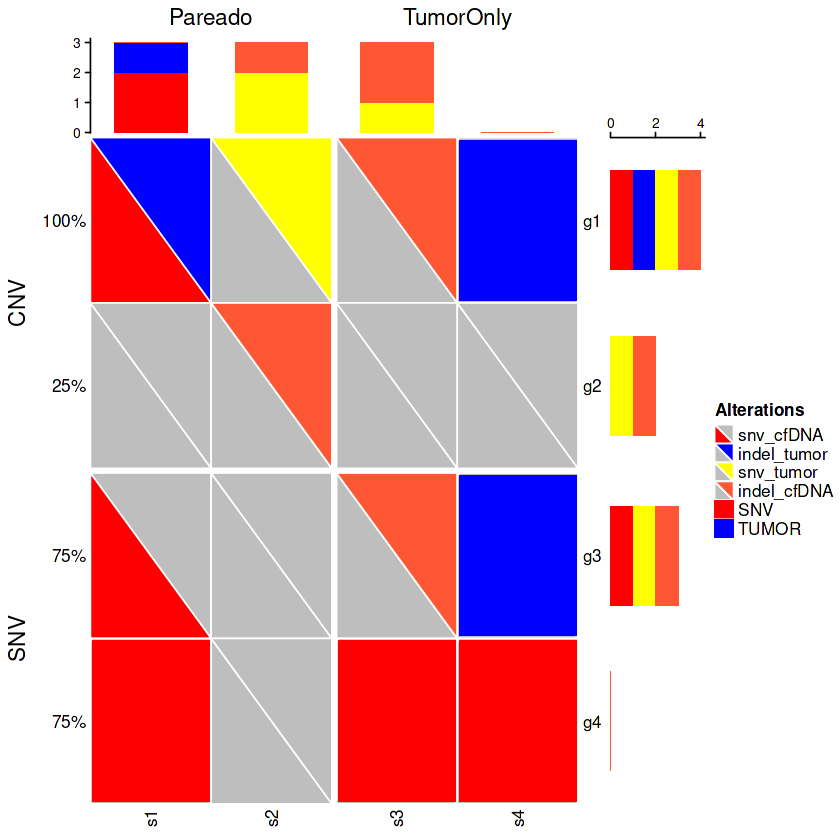

In [7]:
oncoPrint(mat, show_column_names = TRUE,
    alter_fun = list(
        background = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = "grey", col = "white"))
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = "grey", col = "white"))
        },
        snv_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = col["snv_cfDNA"], col = "white"))
        },
         indel_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["indel_tumor"], col = "white"))
        },
        snv_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["snv_tumor"], col = "white"))
        },
        indel_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["indel_cfDNA"], col = "white"))
        },
        SNV =  function(x, y, w, h) {
        grid.rect(x, y, w*0.97, h*0.97, gp = gpar(fill = "red", col = NA))
        },
        TUMOR =  function(x, y, w, h) 
        grid.rect(x, y, w*0.97, h*0.97, gp = gpar(fill = "blue", col = NA))
        
    ), col = col, row_split = factor(rep(c("CNV", 'SNV'), c(2,2))), 
          column_split = factor(rep(c("Pareado", 'TumorOnly'), c(2,2))) ) 

#%v% Heatmap(m, height = unit(4, "cm"))

In [58]:
factor(rep(c("A", 'B'), c(1,2)))

[1] A B B
Levels: A B

# Final

In [2]:
#df = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/Base.csv', col_names = FALSE)
df = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/BaseRounded.csv', col_names = FALSE)
df

Rows: 95 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (21): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,TumorFraction,0,0.01832,0.01756,0.01458,0.02001,0.01495,⋯,0.01796,0.01355,0.01852,0.01263,0.0132,0.01688,0,0.02047,0.01454,0.01414
NA,NA,NA,M,0,0,0,0,0,0,⋯,0,NA,0,0,0,0,0,0,NA,0
NA,NA,NA,N,0,0,0,0,1,0,⋯,3,NA,0,0,0,2,1,0,NA,1
NA,NA,NA,T,1,1,2,2,4,2,⋯,4,NA,4,4,3,3,2,2,NA,2
NA,NA,NA,Tumor progression,Remission,Remission,Remission,NA,Active disease,Remission,⋯,Remission,Remission,Remission,Remission,Active disease,Remission,Remission,Remission,Remission,Active disease
NA,NA,NA,Histological,IDC,IDC,IDC,IDC,IDC,IDC,⋯,IDC,Phyllodes,Sarcomatoid metaplastic,NA,Metaplastic,NA,IDC,Mucinous,Phyllodes,IDC
NA,NA,NA,Response to QX,Partial,Complete,NA,Partial,Partial,Partial,⋯,NA,Partial,Partial,NA,Progressing disease,NA,NA,NA,NA,NA
NA,NA,NA,Sex,Female,Female,Female,Female,Male,Female,⋯,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
NA,NA,NA,Stadium,I,IA,IIA,IIA,IIIC,IIA,⋯,IIIC,NA,IIIB,IIIB,IIB,IIB,IIA,IIA,NA,NA


In [3]:
age = as.list(df[10,])
age = age[-c(1:4)]
age = as.numeric(age)

stadium = as.list(df[9,])
stadium = stadium[-c(1:4)]
stadium = as.character(stadium)

sex= as.list(df[8,])
sex = sex[-c(1:4)]
sex = as.character(sex)

response = as.list(df[7,])
response = response[-c(1:4)]
response = as.character(response)

cytoband = as.list(df$X3)
cytoband = cytoband[-c(1:11)]
cytoband = as.character(cytoband)

status = as.list(df$X2)
status = status[-c(1:11)]
status = as.character(status)

funct = as.list(df$X1)
funct = funct[-c(1:11)]
funct = as.character(funct)

histologic = as.list(df[6,])
histologic = histologic[-c(1:4)]
histologic = as.character(histologic)

progresion = as.list(df[5,])
progresion = progresion[-c(1:4)]
progresion = as.character(progresion)

t = as.list(df[4,])
t = t[-c(1:4)]
t = as.numeric(t)

n = as.list(df[3,])
n = n[-c(1:4)]
n = as.numeric(n)

tumor = as.list(df[1,])
tumor = tumor[-c(1:4)]
tumor = as.numeric(tumor)

In [4]:
mat <- df[-c(1:10), -c(1:3)]
colnames(mat) = mat[1, ]
mat = as.matrix(mat)
mat[is.na(mat)] = ""
rownames(mat) = mat[, 1]
mat <- mat[,-c(1)]
mat = mat[-1,]
head(mat)

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228
AKT1,,,,,,,,,gain_tumor;,,,,,,,,
AKT3,,,,,,,;loss_cfDNA,,;loss_cfDNA,,;loss_cfDNA,,,,,,
AR,,,,,,,loss_tumor;,,,,,,,loss_tumor;,,,
ARHGAP35,,,,;loss_cfDNA,,,,;loss_cfDNA,,,;loss_cfDNA,,,,,,
ARID1A,,,,,,,;loss_cfDNA,,;loss_cfDNA,,;loss_cfDNA,,,loss_tumor;,,,
ARID2,,,,,,,,,,;loss_cfDNA,;loss_cfDNA,,,,,,


In [5]:
df_tumor = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/Tumor.csv')
mat_tumor = as.matrix(df_tumor)
mat_tumor[is.na(mat_tumor)] = ""
mat_tumor <- mat_tumor[,-c(1)]
rownames(mat_tumor) = mat_tumor[, 1]
mat_tumor <- mat_tumor[,-c(1)]
head(mat_tumor)

New names:
• `` -> `...1`
Rows: 84 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID
dbl (18): ...1, UEB_0205, UEB_0208, UEB_0209, UEB_0210, UEB_0211, UEB_0213, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228
AKT1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
AKT3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
ARHGAP35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ARID1A,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ARID2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_cfDNA = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/cfDNA.csv')
mat_cfDNA = as.matrix(df_cfDNA)
mat_cfDNA[is.na(mat_cfDNA)] = ""
mat_cfDNA <- mat_cfDNA[,-c(1)]
rownames(mat_cfDNA) = mat_cfDNA[, 1]
mat_cfDNA <- mat_cfDNA[,-c(1)]
head(mat_cfDNA)

New names:
• `` -> `...1`
Rows: 84 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID
dbl (18): ...1, UEB_0205, UEB_0208, UEB_0209, UEB_0210, UEB_0211, UEB_0213, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228
AKT1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AKT3,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ARHGAP35,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
ARID1A,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
ARID2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [7]:
get_type_fun = function(x) strsplit(x, ";")[[1]]

col = c(loss_cfDNA = "#2e81c6", loss_tumor = "blue", gain_tumor="#ea4c4c", gain_cfDNA="#ea4c4c")
mat_list = list(mat_tumor,mat_cfDNA)

All mutation types: loss_tumor, loss_cfDNA, gain_tumor.



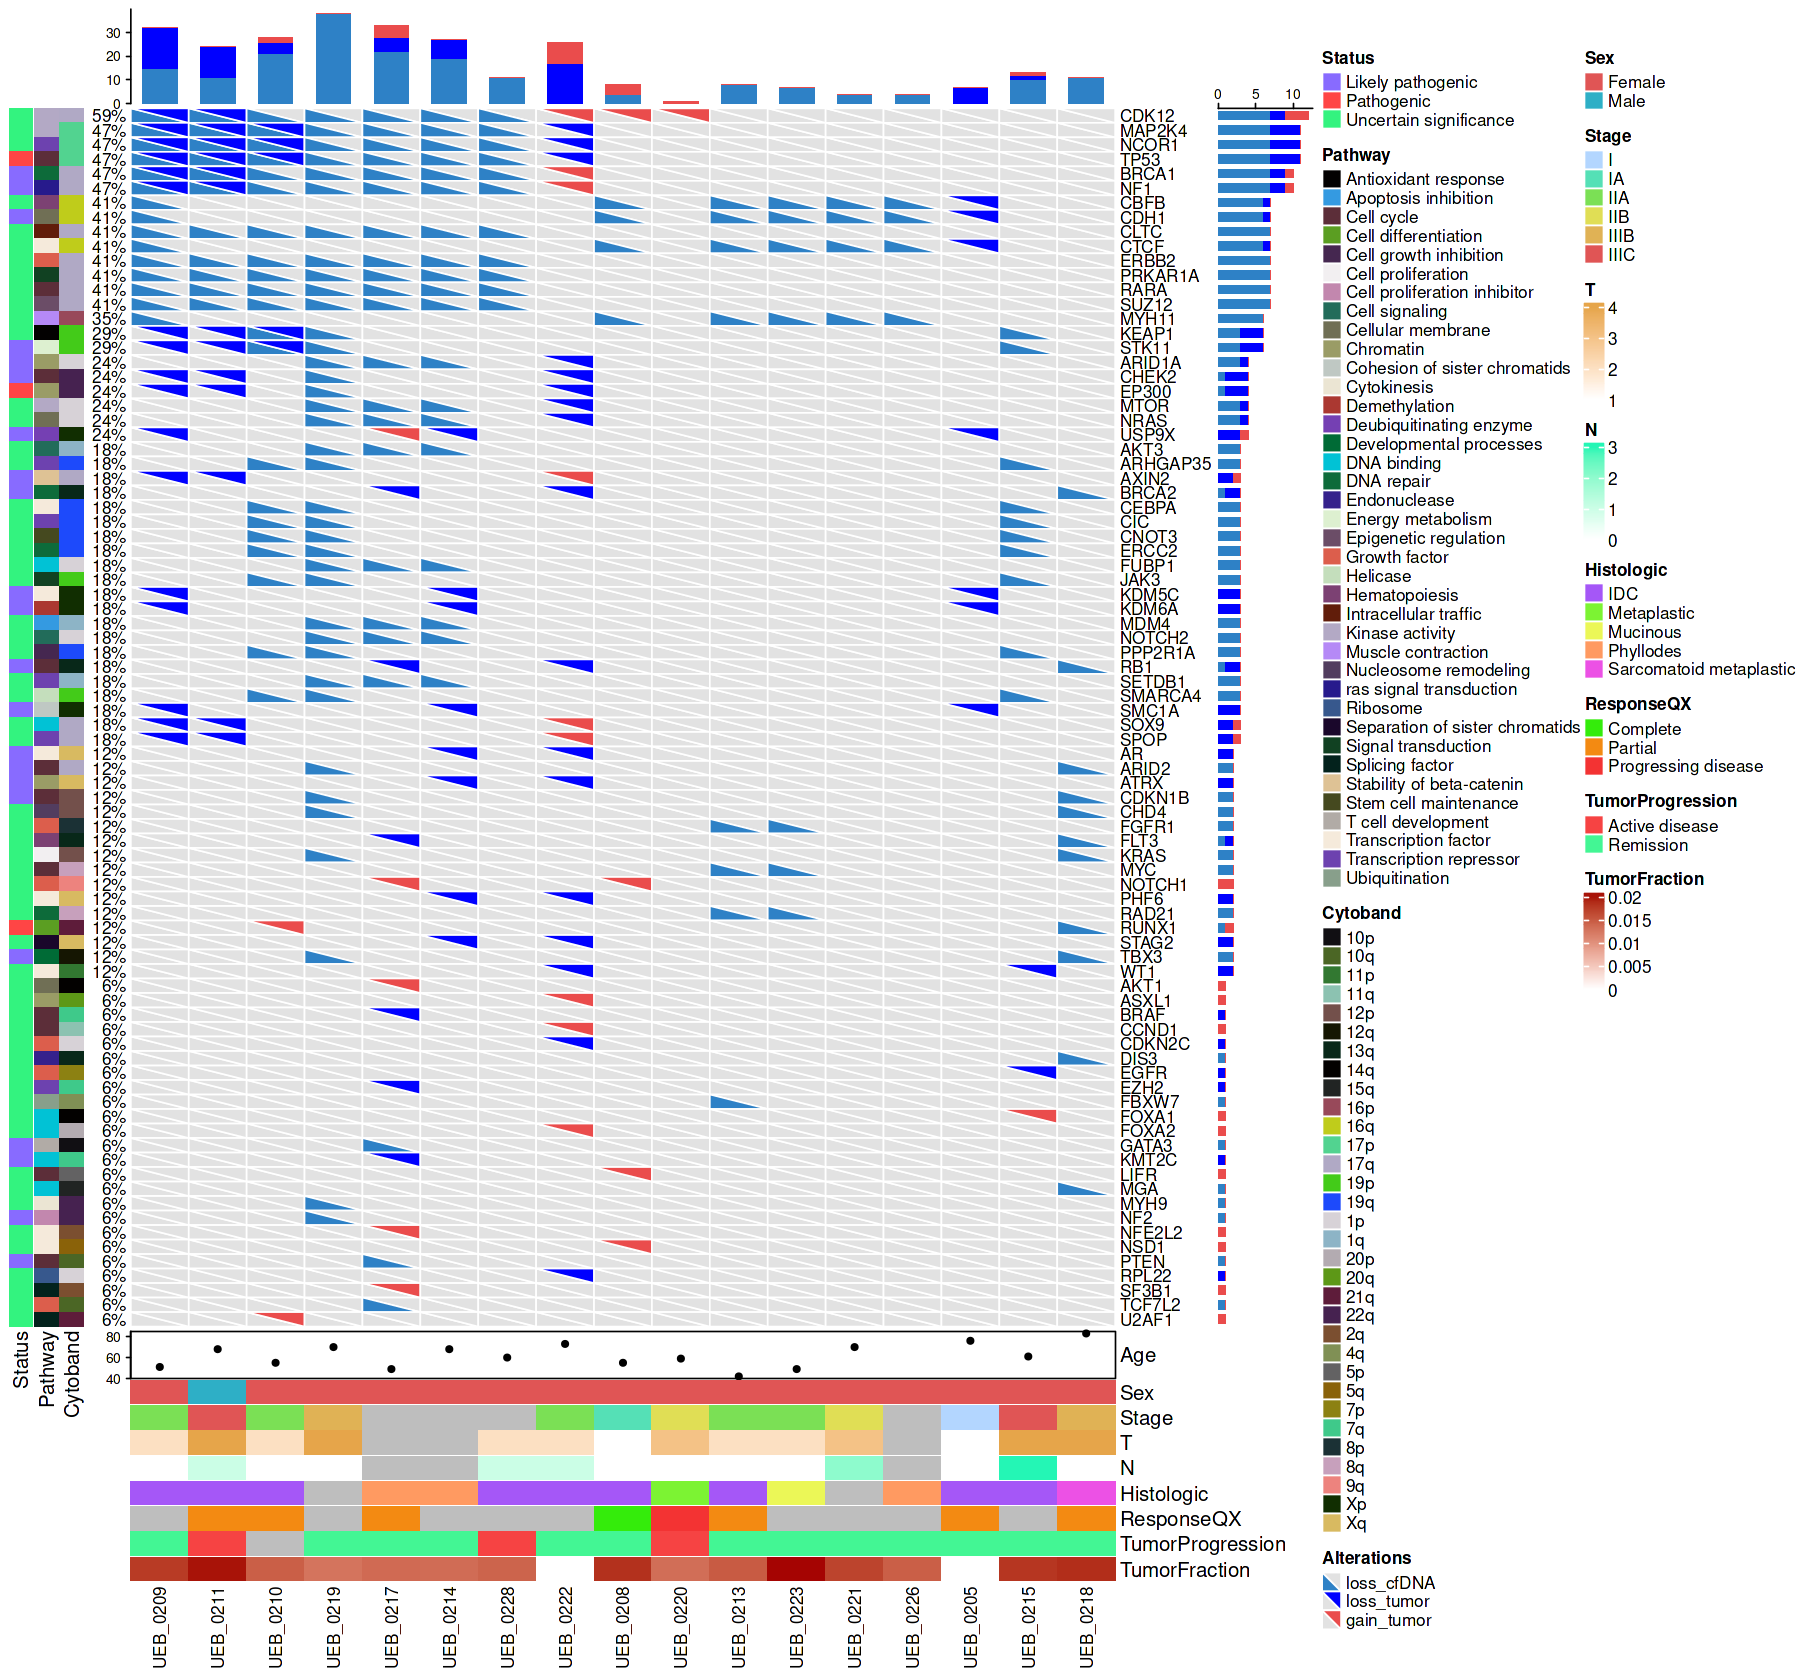

In [9]:
options(repr.plot.width = 15, repr.plot.height = 14)

oncoPrint(mat,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    alter_fun = list(
        background = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = "#e2e2e2", col = "white"))
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = "#e2e2e2", col = "white"))
        },
        loss_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = col["loss_cfDNA"], col = "white"))
        },
         loss_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["loss_tumor"], col = "white"))
        },
        gain_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["gain_tumor"], col = "white"))
        },
        gain_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = col["gain_cfDNA"], col = "white"))
        }
    ), col = col, 
        bottom_annotation = HeatmapAnnotation(Age = anno_points(c(age)), Sex = sex, Stage = stadium,
                                              T = t, N = n, Histologic = histologic,
                                              ResponseQX = response,TumorProgression=progresion,
                                              TumorFraction = tumor,
                            col = list(Sex = c("Female" = "#e05555", "Male" = "#2eafc6"),
                                Stage = c("I" = "#b3d6ff" ,"IA" = "#55e0b6", "IIA" = "#7be055", 
                                                             "IIB" = "#e0de55", "IIIB" = "#e0b255", 
                                                              "IIIC" = "#e05555"),
                                ResponseQX = c("Complete" = "#34ec0b", "Partial" = "#f38a12", 
                                              "Progressing disease"="#f33333"),
                                TumorProgression = c("Active disease" = "#f64343", 
                                                "Remission" = "#43f694"),
                                Histologic = c("IDC" = "#a557f7", 
                                                "Mucinous" = "#ebf757",
                                                "Phyllodes" = "#ff9a61",
                                                "Sarcomatoid metaplastic" = "#ec51e5",
                                                "Metaplastic" = "#7cf333")
                                      )
                                              ), 
        left_annotation = rowAnnotation(Status = status, Pathway = funct, Cytoband = cytoband,
                                       col = list(Status= c("Likely pathogenic"="#886bff", 
                                                            "Pathogenic"="#ff4545", 
                                                  "Uncertain significance"="#33f37f")))
         
         )

# Final V2

In [68]:
#df = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/Base.v2.csv', col_names = FALSE)
df = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/Base_v3.csv', col_names = FALSE)
df

Rows: 125 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (32): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,SubMolec,NA,NA,NA,Luminal B Like HER2+,NA,⋯,NA,NA,Luminal B Like HER2+,NA,Luminal B Like HER2+,Luminal B,Triple Negativo,Luminal B Like HER2+,NA,NA
NA,NA,NA,NA,TumorFraction,0,0.01832,0.01756,0.01458,0.02001,⋯,0.01414,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,M,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NA,NA,NA,NA,N,0,0,0,0,1,⋯,1,1,3,2,2,2,2,0,1,0
NA,NA,NA,NA,T,1,1,2,2,4,⋯,2,2,0,4,4,4,2,3,2,1
NA,NA,NA,NA,Tumor progression,Remission,Remission,Remission,NA,Active disease,⋯,Active disease,Remission,Remission,Remission,NA,Active disease,NA,Remission,Remission,Remission
NA,NA,NA,NA,Histological,IDC,IDC,IDC,IDC,IDC,⋯,IDC,IDC,IDC,IDC,IDC,IDC,IDC,IDC,IDC,Phyllodes
NA,NA,NA,NA,Response to QX,Partial,Complete,NA,Partial,Partial,⋯,NA,Partial,Partial,Partial,NA,NA,NA,NA,NA,Complete
NA,NA,NA,NA,Sex,Female,Female,Female,Female,Male,⋯,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female


In [69]:
age = as.list(df[11,])
age = age[-c(1:5)]
age = as.numeric(age)

stadium = as.list(df[10,])
stadium = stadium[-c(1:5)]
stadium = as.character(stadium)

sex= as.list(df[9,])
sex = sex[-c(1:5)]
sex = as.character(sex)

response = as.list(df[8,])
response = response[-c(1:5)]
response = as.character(response)

cytoband = as.list(df$X4)
cytoband = cytoband[-c(1:12)]
cytoband = as.character(cytoband)

status = as.list(df$X3)
status = status[-c(1:12)]
status = as.character(status)

funct = as.list(df$X2)
funct = funct[-c(1:12)]
funct = as.character(funct)

histologic = as.list(df[7,])
histologic = histologic[-c(1:5)]
histologic = as.character(histologic)

progresion = as.list(df[6,])
progresion = progresion[-c(1:5)]
progresion = as.character(progresion)

t = as.list(df[5,])
t = t[-c(1:5)]
t = as.numeric(t)

n = as.list(df[4,])
n = n[-c(1:5)]
n = as.numeric(n)

tumor = as.list(df[2,])
tumor = tumor[-c(1:5)]
tumor = as.numeric(tumor)

molec = as.list(df[1,])
molec = molec[-c(1:5)]
molec = as.character(molec)

In [70]:
mat <- df[-c(1:11), -c(1:4)]
colnames(mat) = mat[1, ]
mat = as.matrix(mat)
mat[is.na(mat)] = ""
rownames(mat) = mat[, 1]
mat <- mat[,-c(1)]
mat = mat[-1,]
head(mat)

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,⋯,UEB_0228,UEB_0229,UEB_0230,UEB_0231,UEB_0232,UEB_0233,UEB_0234,UEB_0235,UEB_0236,UEB_0212
AKT1,,,,,,,,,gain_tumor;,,⋯,,,,,,,,,,
AKT3,,,,,,,;loss_cfDNA,,;loss_cfDNA,,⋯,,,,,,,,,,
AR,,,,,,,loss_tumor;,,,,⋯,,,loss_tumor;,,loss_tumor;,,,,,loss_tumor;
ARHGAP35,,,,;loss_cfDNA,,,,;loss_cfDNA,,,⋯,,,,,,,,,,
ARID1A,,,,,,,;loss_cfDNA,,;loss_cfDNA,,⋯,,,,,,,,,,
ARID2,,,,,,,,,,;loss_cfDNA,⋯,,,,,,,,,,


In [71]:
df_tumor = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/TumorFilterv2.csv')
mat_tumor = as.matrix(df_tumor)
mat_tumor[is.na(mat_tumor)] = ""
mat_tumor <- mat_tumor[,-c(1)]
rownames(mat_tumor) = mat_tumor[, 1]
mat_tumor <- mat_tumor[,-c(1)]
head(mat_tumor)

New names:
• `` -> `...1`
Rows: 113 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID
dbl (28): ...1, UEB_0205, UEB_0208, UEB_0209, UEB_0210, UEB_0211, UEB_0212, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0212,UEB_0213,UEB_0214,UEB_0215,UEB_0217,⋯,UEB_0227,UEB_0228,UEB_0229,UEB_0230,UEB_0231,UEB_0232,UEB_0233,UEB_0234,UEB_0235,UEB_0236
AKT1,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
AKT3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,1,0,1,0,0,⋯,0,0,0,1,0,1,0,0,0,0
ARHGAP35,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ARID1A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ARID2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [72]:
df_cfDNA = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/cfDNAFilterv2.csv')
mat_cfDNA = as.matrix(df_cfDNA)
mat_cfDNA[is.na(mat_cfDNA)] = ""
mat_cfDNA <- mat_cfDNA[,-c(1)]
rownames(mat_cfDNA) = mat_cfDNA[, 1]
mat_cfDNA <- mat_cfDNA[,-c(1)]
head(mat_cfDNA)

New names:
• `` -> `...1`
Rows: 113 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID
dbl (28): ...1, UEB_0205, UEB_0208, UEB_0209, UEB_0210, UEB_0211, UEB_0212, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0212,UEB_0213,UEB_0214,UEB_0215,UEB_0217,⋯,UEB_0227,UEB_0228,UEB_0229,UEB_0230,UEB_0231,UEB_0232,UEB_0233,UEB_0234,UEB_0235,UEB_0236
AKT1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AKT3,0,0,0,0,0,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ARHGAP35,0,0,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
ARID1A,0,0,0,0,0,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ARID2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [73]:
get_type_fun = function(x) strsplit(x, ";")[[1]]

col = c(loss_cfDNA = "#2e81c6", loss_tumor = "blue", gain_tumor="#ea4c4c", 
        gain_cfDNA = "#ea4c4c", nonsynonymous="#1af613", HotSpot = "#8f3cec",
       loss =  "blue", gain = "#ea4c4c", frameshift = "#ecf613" )
mat_list = list(mat_tumor,mat_cfDNA)

All mutation types: loss_tumor, nonsynonymous, loss_cfDNA, gain_tumor,
HotSpot, frameshift.

Warning message:
“You defined `cell_fun` for a heatmap with more than 100 rows or
columns, which might be very slow to draw. Consider to use the
vectorized version `layer_fun`.”


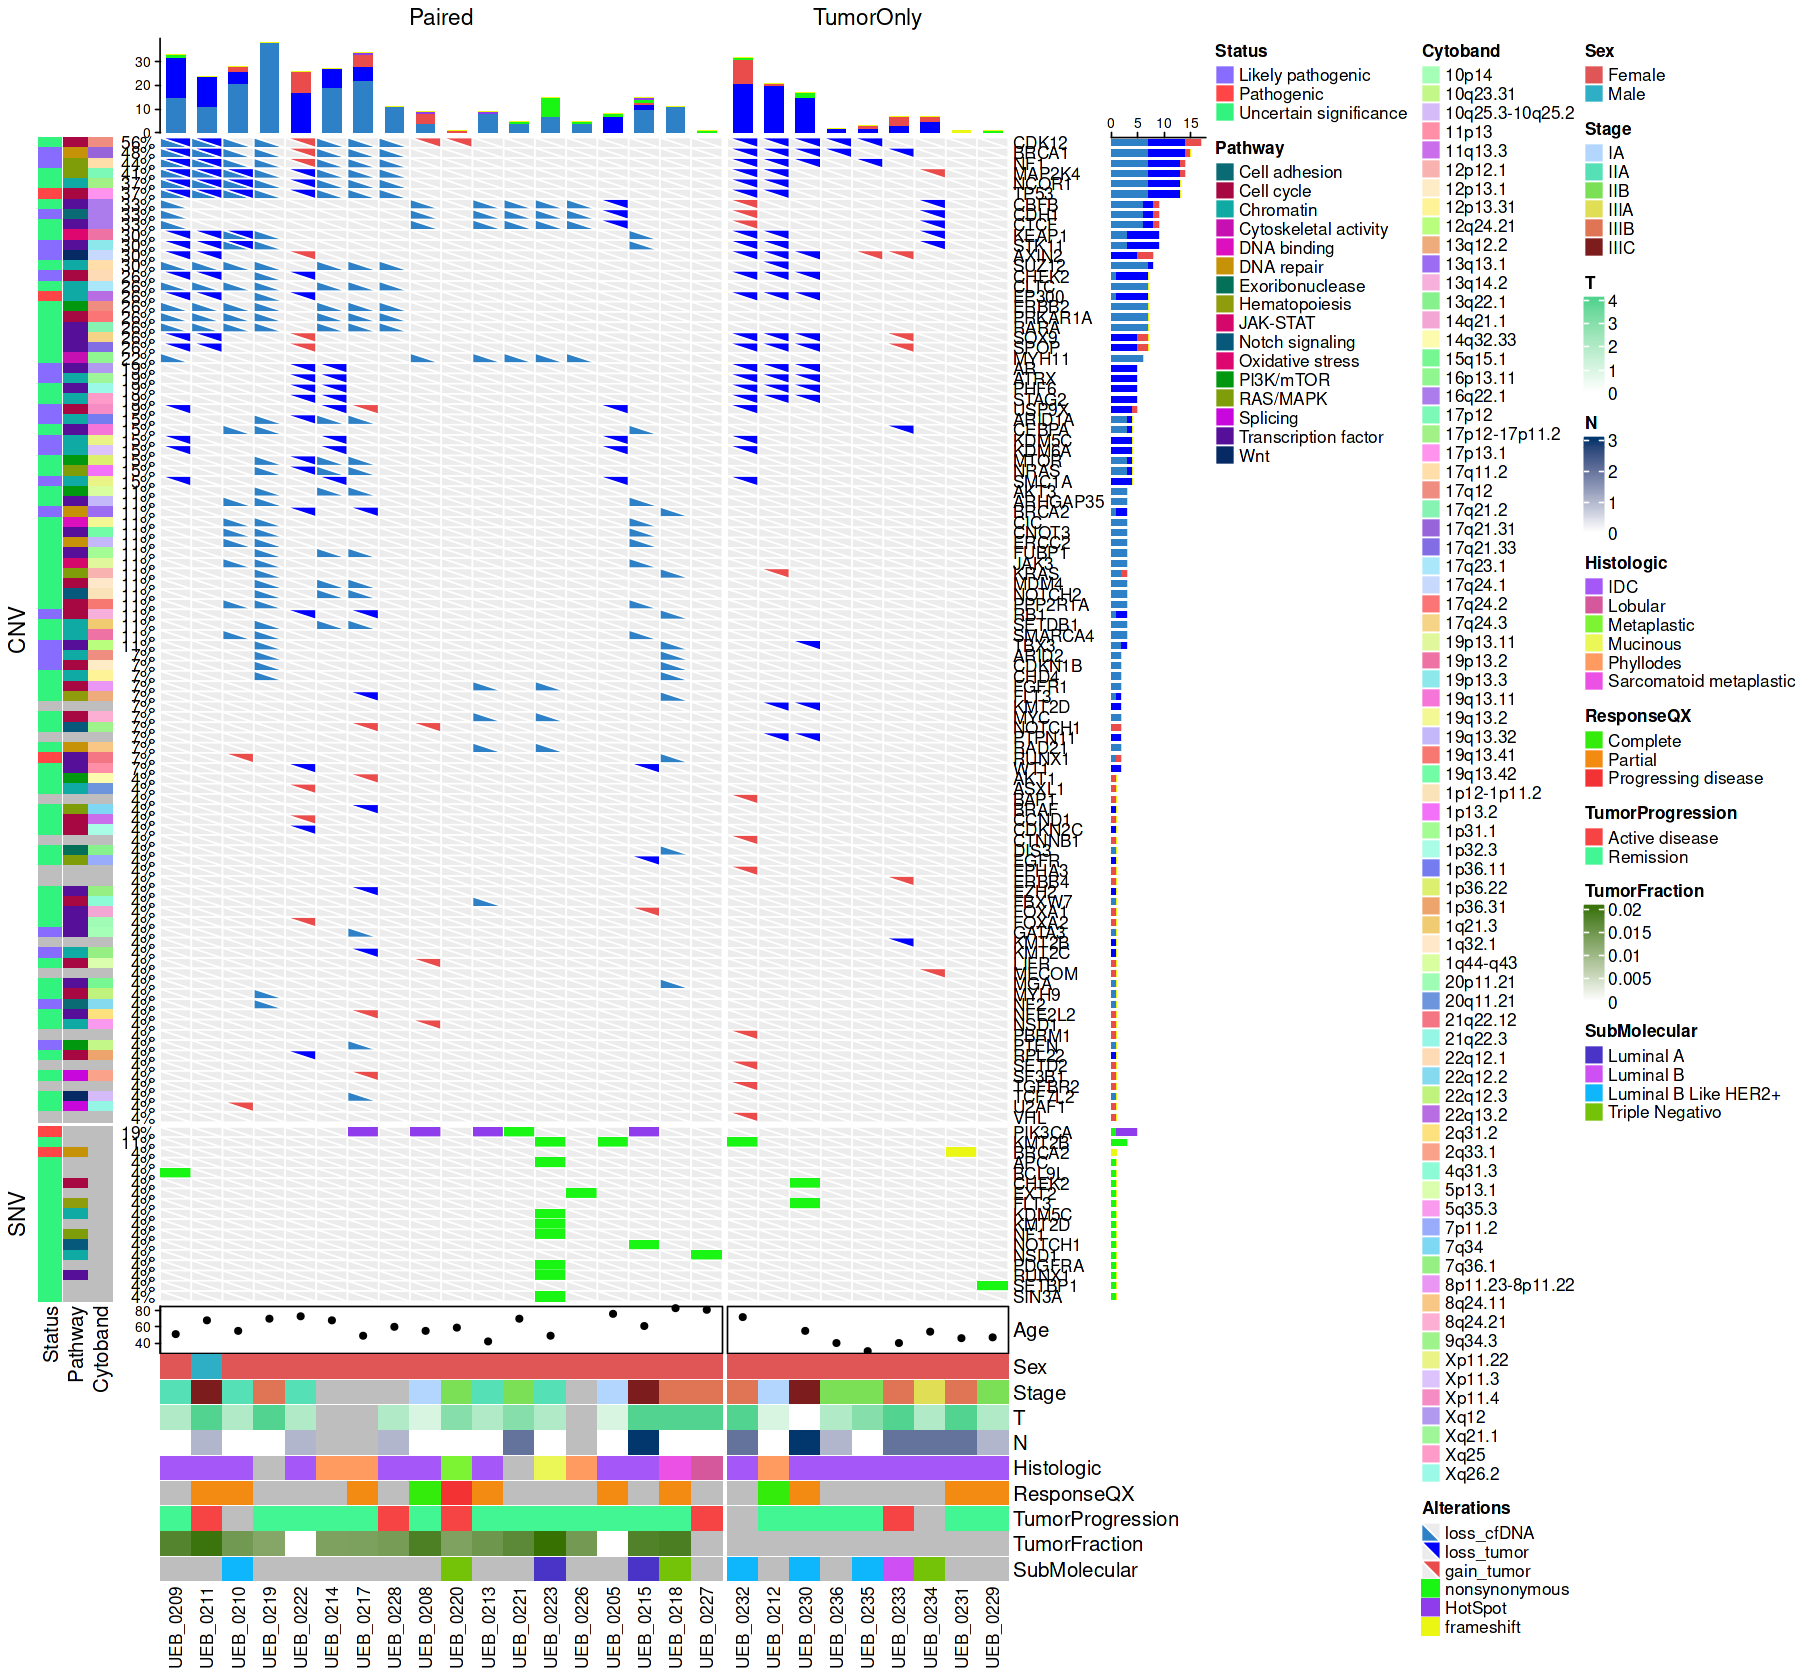

In [74]:
options(repr.plot.width = 15, repr.plot.height = 14)

oncoPrint(mat,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    alter_fun = list(
        background = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = "#ececec", col = "white"))
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = "#ececec", col = "white"))
        },
        loss_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = col["loss_cfDNA"], col = "white"))
        },
         loss_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["loss_tumor"], col = "white"))
        },
        gain_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["gain_tumor"], col = "white"))
        },
        gain_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = col["gain_cfDNA"], col = "white"))
        },
        nonsynonymous =  function(x, y, w, h) {
        grid.rect(x, y, w*0.95, h*0.95, gp = gpar(fill = col["nonsynonymous"], col = NA))
        },
        HotSpot =  function(x, y, w, h) {
        grid.rect(x, y, w*0.95, h*0.95, gp = gpar(fill = col["HotSpot"], col = NA))
        },  
        loss =  function(x, y, w, h) {
        grid.rect(x, y, w*0.95, h*0.95, gp = gpar(fill = col["loss"], col = NA))
        },
        gain =  function(x, y, w, h) {
        grid.rect(x, y, w*0.95, h*0.95, gp = gpar(fill = col["gain"], col = NA))
        },
        frameshift =  function(x, y, w, h) {
        grid.rect(x, y, w*0.95, h*0.95, gp = gpar(fill = col["frameshift"], col = NA))
        }
        
        
        
    ), 
          col = col, row_split = factor(rep(c("CNV", 'SNV'), c(96,17))),
          column_split = factor(rep(c("Paired", 'TumorOnly'), c(18,9))),
          
           bottom_annotation = HeatmapAnnotation(Age = anno_points(c(age)), Sex = sex, Stage = stadium,
                                              T = t, N = n, Histologic = histologic,
                                              ResponseQX = response,TumorProgression=progresion,
                                              TumorFraction = tumor, SubMolecular = molec,
                            col = list(Sex = c("Female" = "#e05555", "Male" = "#2eafc6"),
                                Stage = c("IA" = "#b3d6ff", "IIA" = "#55e0b6", 
                                                             "IIB" = "#7be055", 
                                          "IIIB" = "#e07555", 
                                                              "IIIC" = "#7c1c1c",
                                         "IIIA" = '#e0de55'),
                                ResponseQX = c("Complete" = "#34ec0b", "Partial" = "#f38a12", 
                                              "Progressing disease"="#f33333"),
                                TumorProgression = c("Active disease" = "#f64343", 
                                                "Remission" = "#43f694"),
                                Histologic = c("IDC" = "#a557f7", 
                                                "Mucinous" = "#ebf757",
                                                "Phyllodes" = "#ff9a61",
                                                "Sarcomatoid metaplastic" = "#ec51e5",
                                                "Metaplastic" = "#7cf333",
                                              "Lobular" = "#d5589c" )
                                      )
                                              ), 
        left_annotation = rowAnnotation(Status = status, Pathway = funct, Cytoband = cytoband,
                                       col = list(Status= c("Likely pathogenic"="#886bff", 
                                                            "Pathogenic"="#ff4545", 
                                                  "Uncertain significance"="#33f37f")))
         
         )

# Oncoprint Filter

In [10]:
df = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/BaseRoundedFilter.csv', col_names = FALSE)
df

Rows: 31 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (21): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,TumorFraction,0,0.01832,0.01756,0.01458,0.02001,0.01495,⋯,0.01796,0.01355,0.01852,0.01263,0.0132,0.01688,0,0.02047,0.01454,0.01414
NA,NA,NA,M,0,0,0,0,0,0,⋯,0,NA,0,0,0,0,0,0,NA,0
NA,NA,NA,N,0,0,0,0,1,0,⋯,3,NA,0,0,0,2,1,0,NA,1
NA,NA,NA,T,1,1,2,2,4,2,⋯,4,NA,4,4,3,3,2,2,NA,2
NA,NA,NA,Tumor progression,Remission,Remission,Remission,NA,Active disease,Remission,⋯,Remission,Remission,Remission,Remission,Active disease,Remission,Remission,Remission,Remission,Active disease
NA,NA,NA,Histological,IDC,IDC,IDC,IDC,IDC,IDC,⋯,IDC,Phyllodes,Sarcomatoid metaplastic,NA,Metaplastic,NA,IDC,Mucinous,Phyllodes,IDC
NA,NA,NA,Response to QX,Partial,Complete,NA,Partial,Partial,Partial,⋯,NA,Partial,Partial,NA,Progressing disease,NA,NA,NA,NA,NA
NA,NA,NA,Sex,Female,Female,Female,Female,Male,Female,⋯,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
NA,NA,NA,Stadium,I,IA,IIA,IIA,IIIC,IIA,⋯,IIIC,NA,IIIB,IIIB,IIB,IIB,IIA,IIA,NA,NA


In [11]:
age = as.list(df[10,])
age = age[-c(1:4)]
age = as.numeric(age)

stadium = as.list(df[9,])
stadium = stadium[-c(1:4)]
stadium = as.character(stadium)

sex= as.list(df[8,])
sex = sex[-c(1:4)]
sex = as.character(sex)

response = as.list(df[7,])
response = response[-c(1:4)]
response = as.character(response)

cytoband = as.list(df$X3)
cytoband = cytoband[-c(1:11)]
cytoband = as.character(cytoband)

status = as.list(df$X2)
status = status[-c(1:11)]
status = as.character(status)

funct = as.list(df$X1)
funct = funct[-c(1:11)]
funct = as.character(funct)

histologic = as.list(df[6,])
histologic = histologic[-c(1:4)]
histologic = as.character(histologic)

progresion = as.list(df[5,])
progresion = progresion[-c(1:4)]
progresion = as.character(progresion)

t = as.list(df[4,])
t = t[-c(1:4)]
t = as.numeric(t)

n = as.list(df[3,])
n = n[-c(1:4)]
n = as.numeric(n)

tumor = as.list(df[1,])
tumor = tumor[-c(1:4)]
tumor = as.numeric(tumor)

In [12]:
mat <- df[-c(1:10), -c(1:3)]
colnames(mat) = mat[1, ]
mat = as.matrix(mat)
mat[is.na(mat)] = ""
rownames(mat) = mat[, 1]
mat <- mat[,-c(1)]
mat = mat[-1,]
head(mat)

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228
ARID1A,,,,,,,;loss_cfDNA,,;loss_cfDNA,,;loss_cfDNA,,,loss_tumor;,,,
BRCA1,,,loss_tumor;loss_cfDNA,;loss_cfDNA,loss_tumor;loss_cfDNA,,;loss_cfDNA,,;loss_cfDNA,,;loss_cfDNA,,,gain_tumor;,,,;loss_cfDNA
BRCA2,,,,,,,,,loss_tumor;,;loss_cfDNA,,,,loss_tumor;,,,
CBFB,loss_tumor;,;loss_cfDNA,;loss_cfDNA,,,;loss_cfDNA,,,,,,,;loss_cfDNA,,;loss_cfDNA,;loss_cfDNA,
CDH1,loss_tumor;,;loss_cfDNA,;loss_cfDNA,,,;loss_cfDNA,,,,,,,;loss_cfDNA,,;loss_cfDNA,;loss_cfDNA,
CDK12,,gain_tumor;,loss_tumor;loss_cfDNA,;loss_cfDNA,loss_tumor;loss_cfDNA,,;loss_cfDNA,,;loss_cfDNA,,;loss_cfDNA,gain_tumor;,,gain_tumor;,,,;loss_cfDNA


In [13]:
df_tumor = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/TumorFilter.csv')
mat_tumor = as.matrix(df_tumor)
mat_tumor[is.na(mat_tumor)] = ""
mat_tumor <- mat_tumor[,-c(1)]
rownames(mat_tumor) = mat_tumor[, 1]
mat_tumor <- mat_tumor[,-c(1)]
head(mat_tumor)

New names:
• `` -> `...1`
Rows: 20 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID
dbl (18): ...1, UEB_0205, UEB_0208, UEB_0209, UEB_0210, UEB_0211, UEB_0213, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228
ARID1A,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
BRCA1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
BRCA2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
CBFB,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CDH1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK12,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [14]:
df_cfDNA = read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/cfDNAFilter.csv')
mat_cfDNA = as.matrix(df_cfDNA)
mat_cfDNA[is.na(mat_cfDNA)] = ""
mat_cfDNA <- mat_cfDNA[,-c(1)]
rownames(mat_cfDNA) = mat_cfDNA[, 1]
mat_cfDNA <- mat_cfDNA[,-c(1)]
head(mat_cfDNA)

New names:
• `` -> `...1`
Rows: 20 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID
dbl (18): ...1, UEB_0205, UEB_0208, UEB_0209, UEB_0210, UEB_0211, UEB_0213, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228
ARID1A,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
BRCA1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1
BRCA2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
CBFB,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
CDH1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
CDK12,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1


In [15]:
get_type_fun = function(x) strsplit(x, ";")[[1]]

col = c(loss_cfDNA = "#2e81c6", loss_tumor = "blue", gain_tumor="#ea4c4c", gain_cfDNA="#ea4c4c")
mat_list = list(mat_tumor,mat_cfDNA)

All mutation types: loss_tumor, loss_cfDNA, gain_tumor.



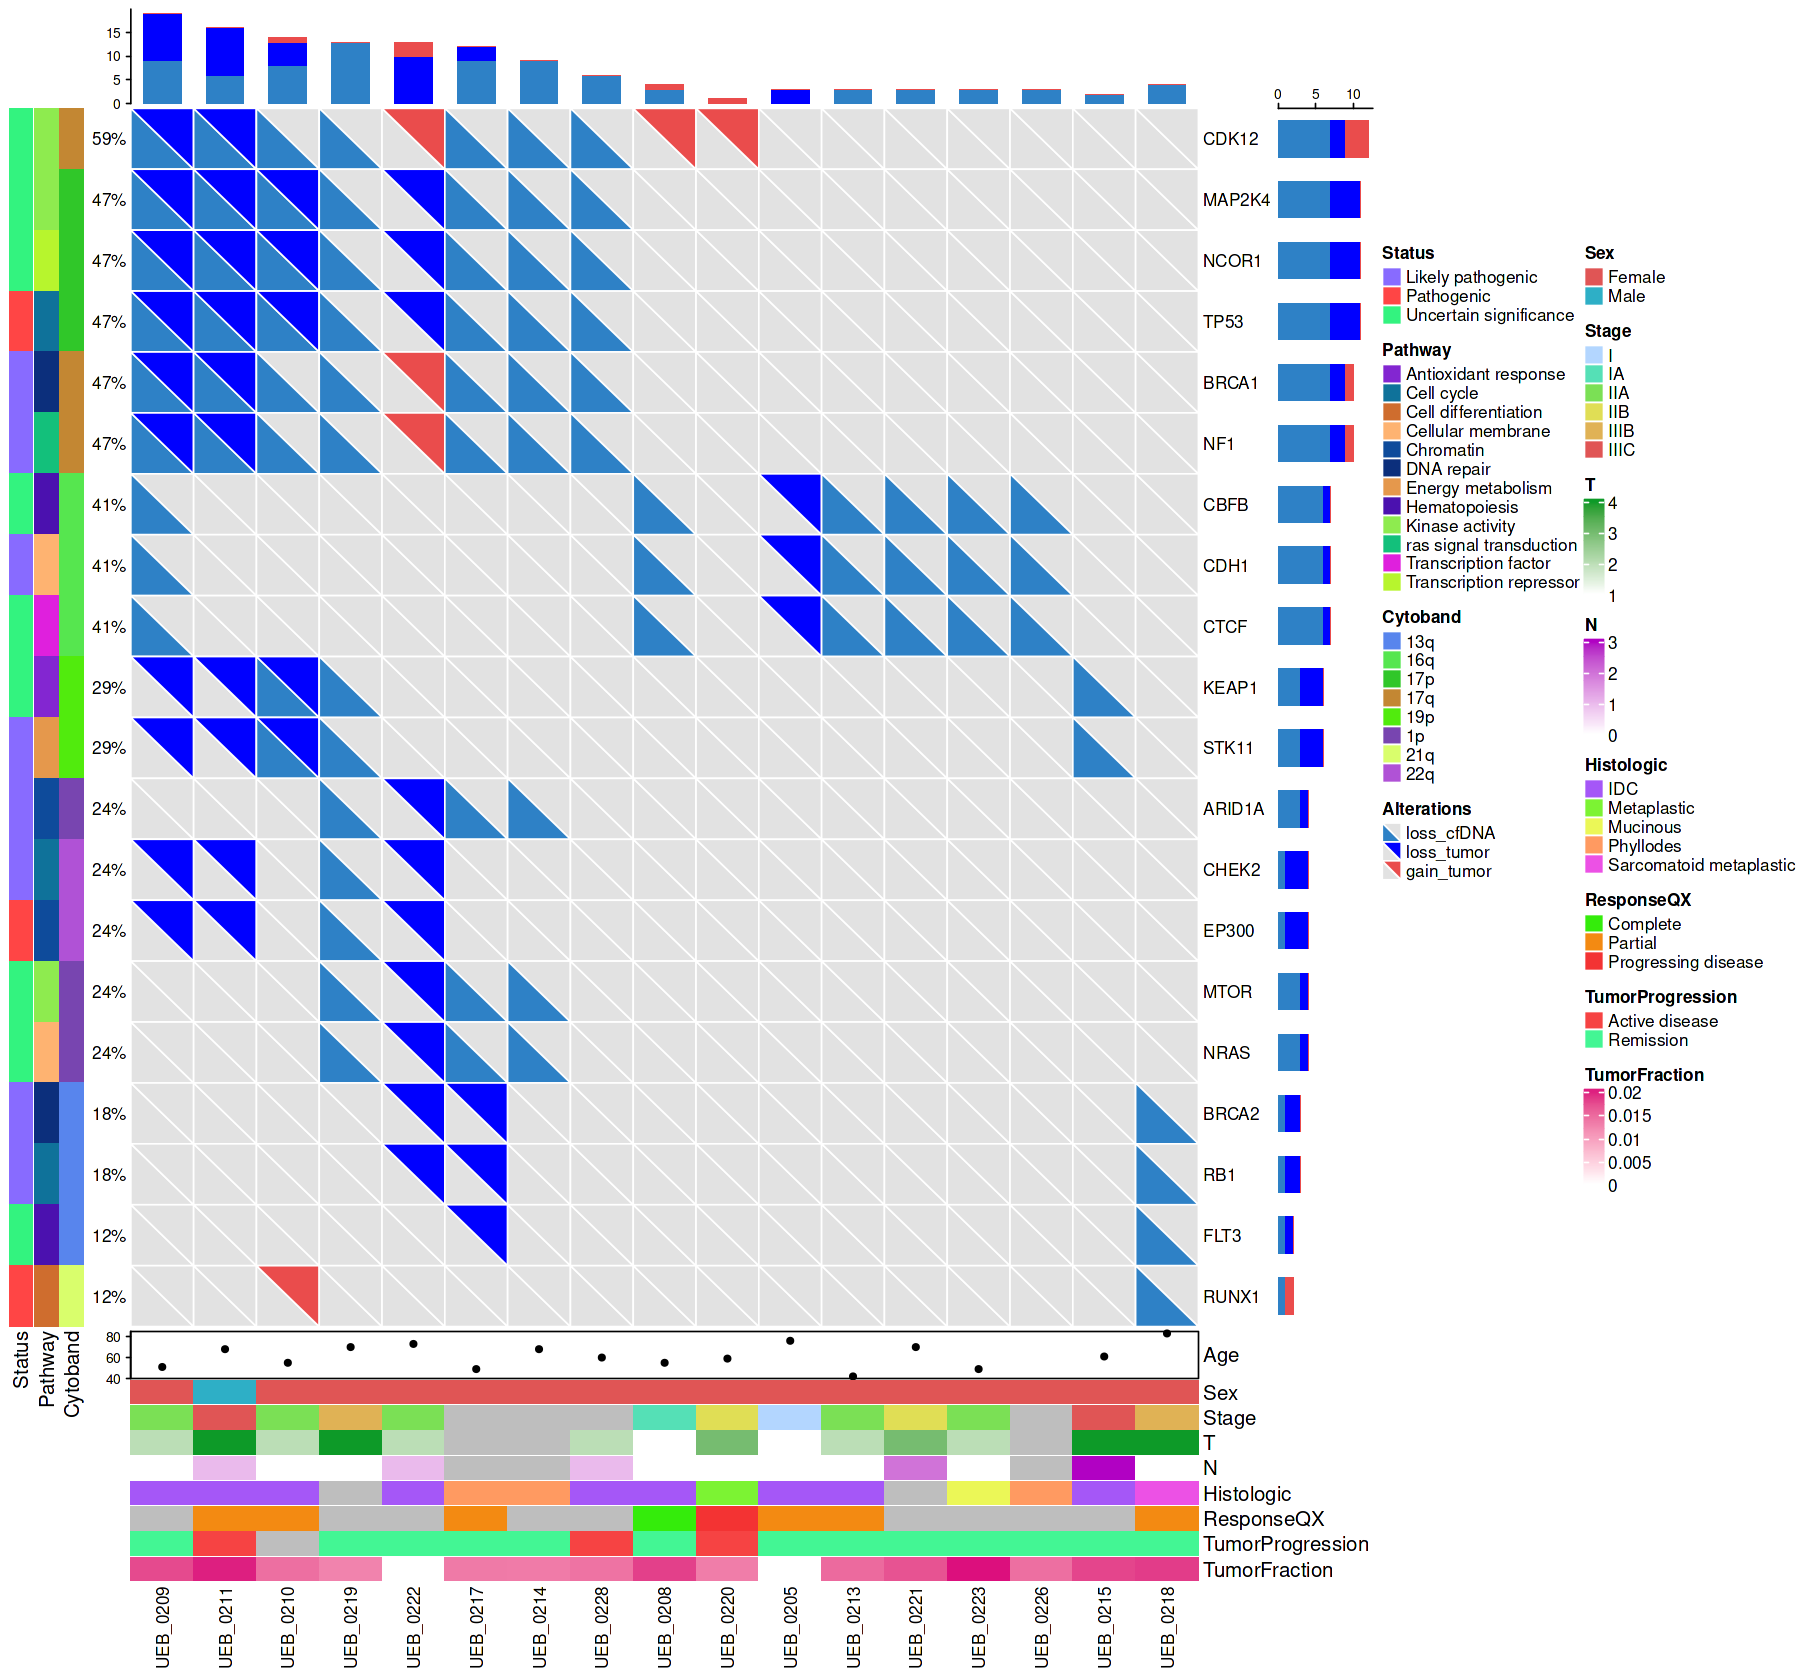

In [17]:
options(repr.plot.width = 15, repr.plot.height = 14)

oncoPrint(mat,show_column_names = TRUE,
    remove_empty_columns = TRUE, remove_empty_rows = TRUE,
    alter_fun = list(
        background = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = "#e2e2e2", col = "white"))
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = "#e2e2e2", col = "white"))
        },
        loss_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = col["loss_cfDNA"], col = "white"))
        },
         loss_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["loss_tumor"], col = "white"))
        },
        gain_tumor = function(x, y, w, h) {
            grid.polygon(
                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                gp = gpar(fill = col["gain_tumor"], col = "white"))
        },
        gain_cfDNA = function(x, y, w, h) {
            grid.polygon(
                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                gp = gpar(fill = col["gain_cfDNA"], col = "white"))
        }
    ), col = col, 
        bottom_annotation = HeatmapAnnotation(Age = anno_points(c(age)), Sex = sex, Stage = stadium,
                                              T = t, N = n, Histologic = histologic,
                                              ResponseQX = response,TumorProgression=progresion,
                                              TumorFraction = tumor,
                            col = list(Sex = c("Female" = "#e05555", "Male" = "#2eafc6"),
                                Stage = c("I" = "#b3d6ff" ,"IA" = "#55e0b6", "IIA" = "#7be055", 
                                                             "IIB" = "#e0de55", "IIIB" = "#e0b255", 
                                                              "IIIC" = "#e05555"),
                                ResponseQX = c("Complete" = "#34ec0b", "Partial" = "#f38a12", 
                                              "Progressing disease"="#f33333"),
                                TumorProgression = c("Active disease" = "#f64343", 
                                                "Remission" = "#43f694"),
                                Histologic = c("IDC" = "#a557f7", 
                                                "Mucinous" = "#ebf757",
                                                "Phyllodes" = "#ff9a61",
                                                "Sarcomatoid metaplastic" = "#ec51e5",
                                                "Metaplastic" = "#7cf333")
                                      )
                                              ), 
        left_annotation = rowAnnotation(Status = status, Pathway = funct, Cytoband = cytoband,
                                       col = list(Status= c("Likely pathogenic"="#886bff", 
                                                            "Pathogenic"="#ff4545", 
                                                  "Uncertain significance"="#33f37f")))
         
         )